In [77]:
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [78]:
ticker = "^BVSP"
inicio = datetime.datetime(2005, 1, 1)
fim = datetime.datetime(2021, 9, 16)
ano = (fim - inicio).days / 365.25
Valor_inicial = 1000

In [79]:
df = pdr.get_data_yahoo(ticker,start = inicio, end = fim)
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-09,113413.0,116354.0,112435.0,115361.0,115361.0,13890600
2021-09-10,115370.0,116896.0,114286.0,114286.0,114286.0,11155700
2021-09-13,114300.0,117046.0,114300.0,116404.0,116404.0,9253400
2021-09-14,116405.0,117270.0,115809.0,116181.0,116181.0,9034100
2021-09-15,116191.0,116312.0,114741.0,115063.0,115063.0,9456800


In [80]:
#drop de colunas
df = df.drop(['High', 'Low', 'Volume', 'Adj Close'], 1)

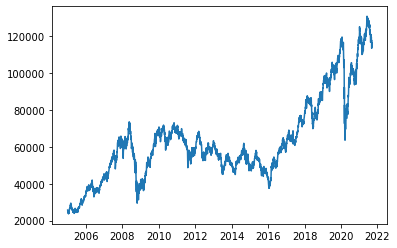

In [81]:
#plot do gráfico
plt.plot(df.Close)
plt.show()

In [84]:

#Calculo variação diaria
df['variacao_diaria_ativo'] = df.Close / df.Open  #Retorno em razão diario -> variação diaria

df['Balanco_capital_BandH'] = Valor_inicial * df.variacao_diaria_ativo.cumprod()  #Variação acumulada do retorno diario -> retorno em dinheiros

df.tail()

,Open,Close,variacao_diaria_ativo,Balanco_capital_BandH
Date,,,,
2021-09-09,113413.0,115361.0,1.017176,4180.696348
2021-09-10,115370.0,114286.0,0.990604,4141.415124
2021-09-13,114300.0,116404.0,1.018408,4217.649047
2021-09-14,116405.0,116181.0,0.998076,4209.532958
2021-09-15,116191.0,115063.0,0.990292,4168.666168


In [86]:
#Metricas Buy and Hold
Retorno_BandH = round(((df.Balanco_capital_BandH[-1] / df.Balanco_capital_BandH[0]) - 1) * 100, 2)
cagr_BandH = round((((df.Balanco_capital_BandH[-1] / df.Balanco_capital_BandH[0]) ** (1/ano))-1) * 100, 2)

print(Retorno_BandH)
print(cagr_BandH)

324.5
9.04


In [112]:
#Drawdown
df['BandH_maxima'] = df.Balanco_capital_BandH.cummax()

df['BandH_DD'] = df.Balanco_capital_BandH - df.BandH_maxima

BandH_DD = round((((df.BandH_DD / df.BandH_maxima).min()) * 100), 2)

BandH_DD

-59.87

In [113]:
def cruzamento_MM(df, periodo_curta, periodo_longa):
    
    #Criar Sinais de compra e venda
  df['MM_curta'] = df['Close'].rolling(periodo_curta).mean()
  df['MM_longa'] = df['Close'].rolling(periodo_longa).mean()
    
    #setup
  df['Entrada'] = df['MM_curta'] > df['MM_longa']
   
    #Retorno do setup
  df['Retorno_setup'] = np.where(df.Entrada.shift(1) == True, df.variacao_diaria_ativo, 1)  
    
    #Retorno em valor do setup
  df['Balanco_setup'] = Valor_inicial * df.Retorno_setup.cumprod()

  return(df)

In [95]:
periodos_curta = [9,21, 40, 50 , 60, 70]
periodos_longo = [80, 100, 200, 400] 
resultado = 0
melhor_periodo_curta = 0
melhor_periodo_longo = 0


In [96]:
for periodo_1 in periodos_curta:
    for periodo_2 in periodos_longo:
            aux = cruzamento_MM(df, periodo_1, periodo_2).iloc[-1][-1]
            if aux > resultado:
                resultado = aux
                melhor_periodo_MMcurta = periodo_1
                melhor_periodo_MMlongo = periodo_2
 

In [97]:
print(resultado)
print(melhor_periodo_MMcurta)
print(melhor_periodo_MMlongo)



4458.549489847762
9
80


In [98]:
df.head(60)

,Open,Close,variacao_diaria_ativo,Balanco_capital_BandH,BandH_maxima,BandH_DD,MM_curta,MM_longa,Entrada,Retorno_setup,Balanco_setup
Date,,,,,,,,,,,
2005-01-03,26193.0,25722.0,0.982018,982.018096,982.018096,0.000000,NaN,NaN,False,1.0,1000.0
2005-01-04,25722.0,24848.0,0.966021,948.650403,982.018096,-33.367694,NaN,NaN,False,1.0,1000.0
2005-01-05,24859.0,24692.0,0.993282,942.277475,982.018096,-39.740622,NaN,NaN,False,1.0,1000.0
2005-01-06,24695.0,24367.0,0.986718,929.762107,982.018096,-52.255990,NaN,NaN,False,1.0,1000.0
2005-01-07,24376.0,24747.0,1.015220,943.912982,982.018096,-38.105114,NaN,NaN,False,1.0,1000.0
2005-01-10,24747.0,24292.0,0.981614,926.558135,982.018096,-55.459961,NaN,NaN,False,1.0,1000.0
2005-01-11,24295.0,24370.0,1.003087,929.418471,982.018096,-52.599626,NaN,NaN,False,1.0,1000.0
2005-01-12,24370.0,24510.0,1.005745,934.757765,982.018096,-47.260332,NaN,NaN,False,1.0,1000.0
2005-01-13,24523.0,24806.0,1.011540,945.545044,982.018096,-36.473053,NaN,NaN,False,1.0,1000.0


In [99]:
cruzamento_MM(df,melhor_periodo_MMcurta, melhor_periodo_MMlongo )

,Open,Close,variacao_diaria_ativo,Balanco_capital_BandH,BandH_maxima,BandH_DD,MM_curta,MM_longa,Entrada,Retorno_setup,Balanco_setup
Date,,,,,,,,,,,
2005-01-03,26193.0,25722.0,0.982018,982.018096,982.018096,0.000000,NaN,NaN,False,1.0,1000.00000
2005-01-04,25722.0,24848.0,0.966021,948.650403,982.018096,-33.367694,NaN,NaN,False,1.0,1000.00000
2005-01-05,24859.0,24692.0,0.993282,942.277475,982.018096,-39.740622,NaN,NaN,False,1.0,1000.00000
2005-01-06,24695.0,24367.0,0.986718,929.762107,982.018096,-52.255990,NaN,NaN,False,1.0,1000.00000
2005-01-07,24376.0,24747.0,1.015220,943.912982,982.018096,-38.105114,NaN,NaN,False,1.0,1000.00000
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,113413.0,115361.0,1.017176,4180.696348,4738.544096,-557.847748,117649.777778,124250.3500,False,1.0,4458.54949
2021-09-10,115370.0,114286.0,0.990604,4141.415124,4738.544096,-597.128972,116939.555556,124141.6750,False,1.0,4458.54949
2021-09-13,114300.0,116404.0,1.018408,4217.649047,4738.544096,-520.895049,116568.888889,124063.7750,False,1.0,4458.54949


In [100]:

def plot_resultado(df):
    df["Close"].plot(figsize=(10, 10), linewidth = 3, fontsize = 15)
    df["MM_curta"].plot(figsize=(10, 10), linewidth = 3, fontsize = 15)
    df["MM_longa"].plot(figsize=(10, 10), linewidth = 3, fontsize = 15)
    plt.xlabel("Data"
           , fontsize = 15);
    plt.ylabel("Retorno"
           , fontsize = 15);
    plt.title("Resultado Trade"
           , fontsize = 25)
    plt.legend();

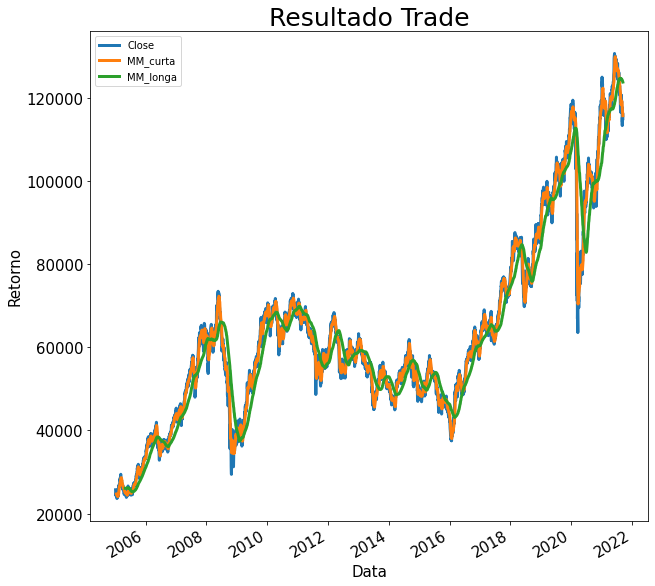

In [101]:

plot_resultado(cruzamento_MM(df,melhor_periodo_MMcurta, melhor_periodo_MMlongo))

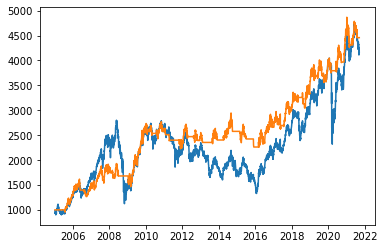

In [102]:
plt.plot(df.Balanco_capital_BandH)
plt.plot(df.Balanco_setup)

In [105]:
#Metricas Trade
retorno_trade = round(((df.Balanco_setup[-1] / df.Balanco_setup[0]) - 1) * 100, 2)
cagr_setup = round((((df.Balanco_setup[-1] / df.Balanco_setup[0]) ** (1/ano))-1) * 100, 2)


print(retorno_trade)
print(cagr_setup)

345.85
9.36


In [110]:
#Drawdown
df['Trade_maxima'] = df.Balanco_setup.cummax()

df['Trade_DD'] = df.Balanco_setup - df.Trade_maxima

Trade_DD = round((((df.Trade_DD / df.Trade_maxima).min()) * 100), 2)

Trade_DD

-24.08

In [117]:
print(f'Retorno Total Buy&Hold: {Retorno_BandH}%')
print(f'CAGR do Buy&Hold: {cagr_BandH}')
print(f'Drawdown Buy&Hold: {BandH_DD}%')
print('')
print(f'Retorno Total do Trade: {retorno_trade}%')
print(f'CAGR do Trade: {cagr_setup}')
print(f'Drawdown Trade: {Trade_DD}%')

Retorno Total Buy&Hold: 324.5%
CAGR do Buy&Hold: 9.04
Drawdown Buy&Hold: -59.87%

Retorno Total do Trade: 345.85%
CAGR do Trade: 9.36
Drawdown Trade: -24.08%
